<a href="https://colab.research.google.com/github/ladata-ufs/Cafezinho-G3/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Conhecendo o DataSet

In [5]:
# Remover o '/content' quando finalizar o projeto
consumo_domestico = pd.read_csv('./data/Coffee_domestic_consumption.csv')
exportacao = pd.read_csv('./data/Coffee_export.csv')
inventorio_cafe_verde = pd.read_csv('./data/Coffee_green_coffee_inventorie.csv')
importacao = pd.read_csv('./data/Coffee_import.csv')
consumo_importadores = pd.read_csv('./data/Coffee_importers_consumption.csv')
producao = pd.read_csv('./data/Coffee_production.csv')
re_exportacao = pd.read_csv('./data/Coffee_re_export.csv')

## Responder à pergunta:
Dentre os maiores produtores de Café, quais mais consomem? Há relação entre um país produtor e um país consumidor de café?

### Análise dos DataFrames

#### Consumidores

In [6]:
consumo_domestico.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


In [7]:
consumo_domestico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     55 non-null     object
 1   Coffee type                 55 non-null     object
 2   1990/91                     55 non-null     int64 
 3   1991/92                     55 non-null     int64 
 4   1992/93                     55 non-null     int64 
 5   1993/94                     55 non-null     int64 
 6   1994/95                     55 non-null     int64 
 7   1995/96                     55 non-null     int64 
 8   1996/97                     55 non-null     int64 
 9   1997/98                     55 non-null     int64 
 10  1998/99                     55 non-null     int64 
 11  1999/00                     55 non-null     int64 
 12  2000/01                     55 non-null     int64 
 13  2001/02                     55 non-null     int64 
 

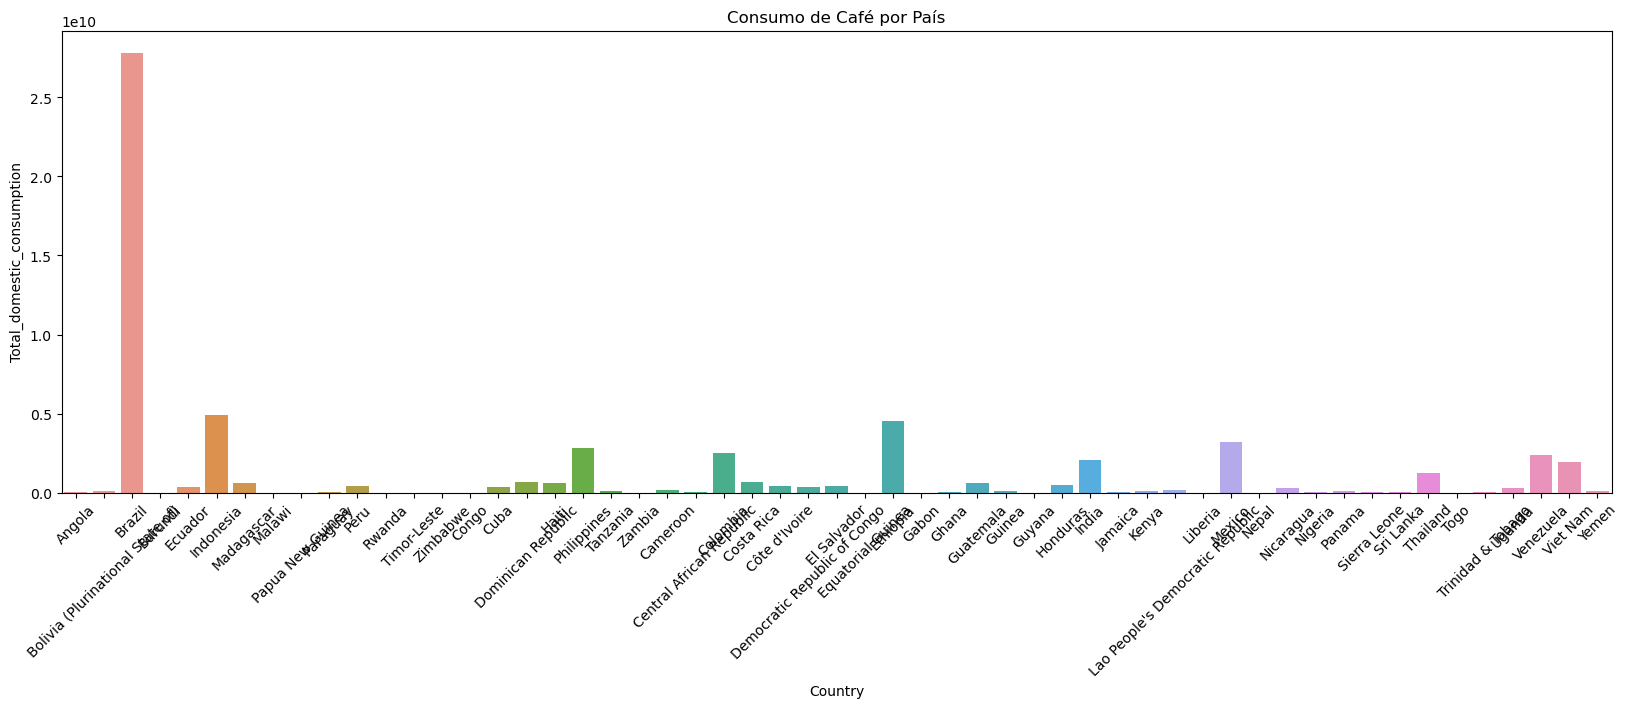

In [90]:
# Barplot
plt.figure(figsize=(20, 6))
sns.barplot(x='Country', y='Total_domestic_consumption', data=consumo_domestico)
plt.xticks(rotation=45)
plt.title('Consumo de Café por País')
plt.show()

Os 10 maiores consumidores de café (sem repetição de países):
2          Brazil
5       Indonesia
29       Ethiopia
41         Mexico
18    Philippines
23       Colombia
52      Venezuela
36          India
53       Viet Nam
48       Thailand
Name: Country, dtype: object


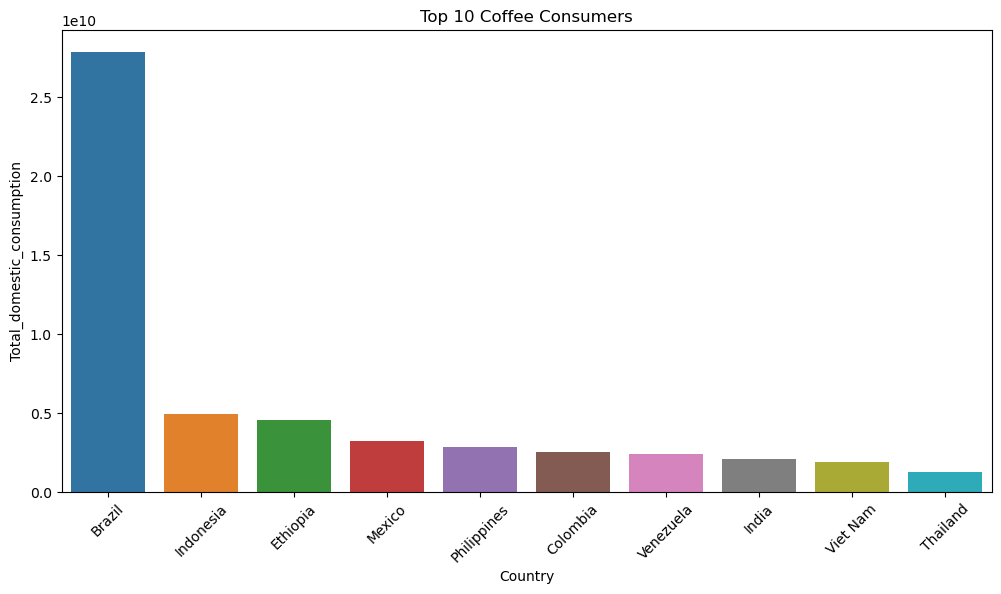

In [100]:
# mesmo gráfico somente com os maiores produtores
# Ordenar o DataFrame pelo valor da produção em ordem decrescente
df_sorted = consumo_domestico.sort_values('Total_domestic_consumption', ascending=False)

# Selecionar os dados dos 10 maiores produtores e evitar a repetição de países
top_10_consumidores = df_sorted['Country'].drop_duplicates().head(10)

# Mostrar os 10 maiores produtores
print("Os 10 maiores consumidores de café (sem repetição de países):")
print(top_10_consumidores)

# Criar o boxplot usando seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_consumidores, y='Total_domestic_consumption', data=consumo_domestico)
plt.xticks(rotation=45)
plt.title('Top 10 Coffee Consumers')
plt.show()


#### Produtores

In [103]:
producao.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,...,1.740000e+06,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06,8.208000e+07
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,...,7.920000e+06,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06,2.070000e+08
2,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
3,Burundi,Arabica/Robusta,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,...,1.224000e+07,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07,6.236400e+08
4,Ecuador,Arabica/Robusta,9.024000e+07,1.274400e+08,7.110000e+07,1.241400e+08,1.425600e+08,1.132800e+08,1.195800e+08,7.146000e+07,...,4.950000e+07,4.968000e+07,3.996000e+07,3.864000e+07,3.864000e+07,3.870000e+07,3.744000e+07,2.976000e+07,3.354000e+07,1.900380e+09


In [105]:
producao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           55 non-null     object 
 1   Coffee type       55 non-null     object 
 2   1990/91           55 non-null     float64
 3   1991/92           55 non-null     float64
 4   1992/93           55 non-null     float64
 5   1993/94           55 non-null     float64
 6   1994/95           55 non-null     float64
 7   1995/96           55 non-null     float64
 8   1996/97           55 non-null     float64
 9   1997/98           55 non-null     float64
 10  1998/99           55 non-null     float64
 11  1999/00           55 non-null     float64
 12  2000/01           55 non-null     float64
 13  2001/02           55 non-null     float64
 14  2002/03           55 non-null     float64
 15  2003/04           55 non-null     float64
 16  2004/05           55 non-null     float64
 17 

In [106]:
producao.describe()

,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
count,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,1.017055e+08,1.104753e+08,1.074775e+08,1.001007e+08,1.017971e+08,9.525927e+07,1.127029e+08,1.089676e+08,1.187629e+08,1.433280e+08,...,1.541749e+08,1.649280e+08,1.679007e+08,1.639625e+08,1.703193e+08,1.770742e+08,1.785742e+08,1.881415e+08,1.800578e+08,4.104269e+09
std,2.510875e+08,2.668466e+08,3.022180e+08,2.489344e+08,2.510328e+08,1.858680e+08,2.602192e+08,2.430145e+08,3.142337e+08,4.012591e+08,...,4.469919e+08,4.931417e+08,5.030529e+08,4.918727e+08,5.059698e+08,5.225472e+08,5.135587e+08,5.851111e+08,5.390922e+08,1.112550e+10
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.080000e+06
25%,2.430000e+06,3.900000e+06,2.640000e+06,2.130000e+06,2.610000e+06,2.610000e+06,2.340000e+06,2.880000e+06,3.480000e+06,3.540000e+06,...,1.980000e+06,1.710000e+06,2.010000e+06,2.250000e+06,2.310000e+06,1.890000e+06,2.160000e+06,2.190000e+06,2.280000e+06,8.199000e+07
50%,2.766000e+07,2.778000e+07,3.000000e+07,2.652000e+07,2.436000e+07,2.604000e+07,2.406000e+07,1.800000e+07,2.634000e+07,2.184000e+07,...,2.094000e+07,2.004000e+07,1.548000e+07,1.488000e+07,1.758000e+07,1.620000e+07,1.584000e+07,1.860000e+07,1.842000e+07,6.236400e+08
75%,9.216000e+07,9.720000e+07,9.234000e+07,9.486000e+07,1.153200e+08,1.127700e+08,1.139700e+08,9.669000e+07,1.076700e+08,1.211700e+08,...,9.735000e+07,9.189000e+07,7.185000e+07,6.960000e+07,6.657000e+07,6.864000e+07,7.053000e+07,7.806000e+07,7.194000e+07,2.785140e+09
max,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,2.205660e+09,2.854680e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
